# **IMPORTACIÓN DE LIBRERIAS**

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
from keras.models import Sequential
from keras import models, layers
import keras
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from timeit import timeit
from time import time

**CARGA DEL DATASET (50000K DE IMÁGENES) JUNTO CON SU RESPECTIVA NORMALIZACIÓN**

In [ ]:

# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)

# **CREACIÓN DEL MODELO**

In [ ]:
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,3), padding='same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

# **ENTRENAMIENTO DEL MODELO**

In [ ]:
start_time = time()
hist = model.fit(x_train, y_train, batch_size= 128, epochs=10 , validation_data=(x_test, y_test), verbose=1)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

Epoch 1/10
391/391 [==============================] - 6s 15ms/step - loss: 1.9926 - accuracy: 0.2744 - val_loss: 1.7172 - val_accuracy: 0.3924
Epoch 2/10
391/391 [==============================] - 6s 15ms/step - loss: 1.7167 - accuracy: 0.3897 - val_loss: 1.7017 - val_accuracy: 0.3914
Epoch 3/10
391/391 [==============================] - 6s 14ms/step - loss: 1.6071 - accuracy: 0.4295 - val_loss: 1.5638 - val_accuracy: 0.4419
Epoch 4/10
391/391 [==============================] - 6s 15ms/step - loss: 1.5366 - accuracy: 0.4554 - val_loss: 1.5015 - val_accuracy: 0.4583
Epoch 5/10
391/391 [==============================] - 6s 14ms/step - loss: 1.4934 - accuracy: 0.4701 - val_loss: 1.4781 - val_accuracy: 0.4699
Epoch 6/10
391/391 [==============================] - 6s 14ms/step - loss: 1.4517 - accuracy: 0.4875 - val_loss: 1.5552 - val_accuracy: 0.4635
Epoch 7/10
391/391 [==============================] - 6s 14ms/step - loss: 1.4241 - accuracy: 0.4989 - val_loss: 1.4924 - val_accuracy: 0.4724

# **RESULTADOS DE LA EVALUACIÓN**

In [ ]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 4ms/step - loss: 1.4885 - accuracy: 0.4835
Test loss 1.4885, accuracy 48.35%


# **GRÁFICA DE EVALUACIÓN Y ENTRAMIENTO ACC**

Text(0, 0.5, 'acc')

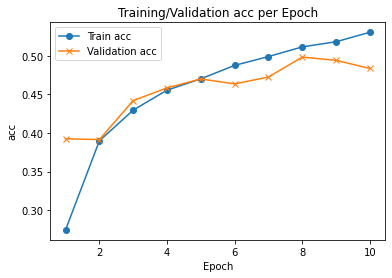

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'],'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

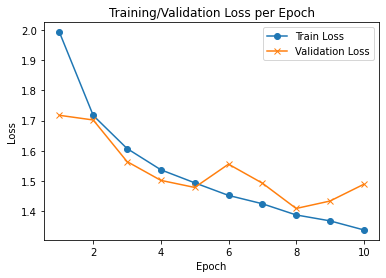

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')